In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [51]:
df = pd.read_csv('Datasets/train_cleaned_data.csv')

In [52]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [53]:
df.describe()

,Unnamed: 0,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190554.000000,190555.000000,38.822584,0.997869,26.388807,0.458210,1.304808,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,110016.836208,15.511611,0.046110,13.229888,0.498251,0.283720,17213.155057,54.203995,83.671304,0.327936
min,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95277.000000,95278.000000,25.000000,1.000000,15.000000,0.000000,1.000000,24405.000000,29.000000,82.000000,0.000000
50%,190554.000000,190555.000000,36.000000,1.000000,28.000000,0.000000,1.500000,31669.000000,133.000000,154.000000,0.000000
75%,285831.000000,285832.000000,49.000000,1.000000,35.000000,1.000000,1.500000,39400.000000,152.000000,227.000000,0.000000
max,381108.000000,381109.000000,85.000000,1.000000,52.000000,1.000000,2.000000,540165.000000,163.000000,299.000000,1.000000


<AxesSubplot:>

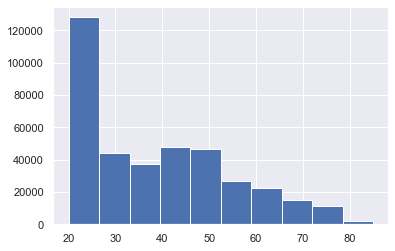

In [54]:
df.Age.hist()

<AxesSubplot:>

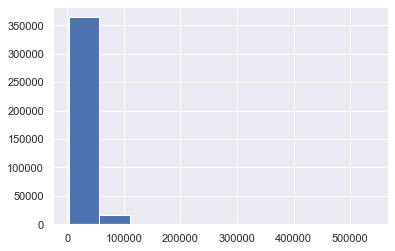

In [55]:
df.Annual_Premium.hist()

<AxesSubplot:>

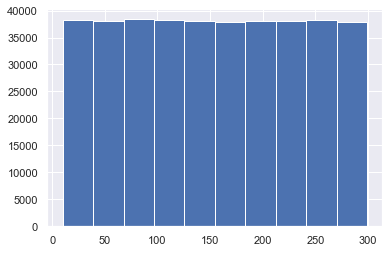

In [56]:
df.Vintage.hist()

<AxesSubplot:>

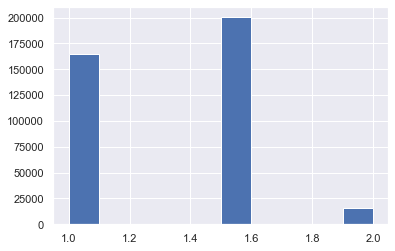

In [57]:
df.Vehicle_Age.hist()

In [58]:
corr = df[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Annual_Premium',	'Policy_Sales_Channel', 'Vintage', 'Response']].corr()
corr

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,0.043778,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,-0.380873,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.041580,-0.550663,-0.001892,0.221874
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,0.041580,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.001892,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.221874,0.022575,-0.139042,-0.001050,1.000000


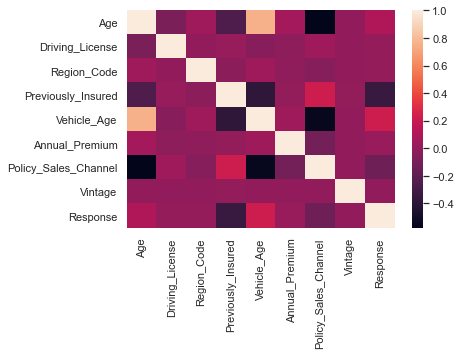

In [59]:
ax = sns.heatmap(corr) ## Possible multicolinearity between age and vehicle_age should look at for regression analysis

In [60]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [61]:
## The categorical variables are Gender, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Policy_Sales_Channel
categorical = df[['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']]

Graph for Gender


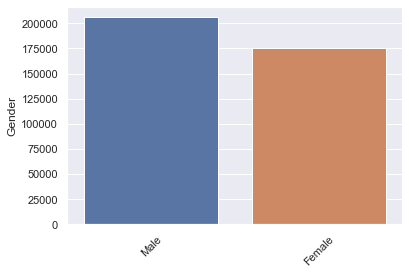

Graph for Driving_License


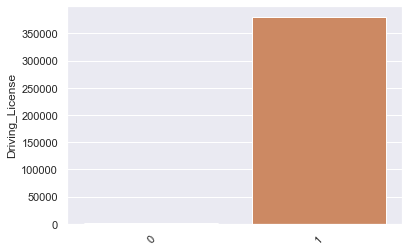

Graph for Region_Code


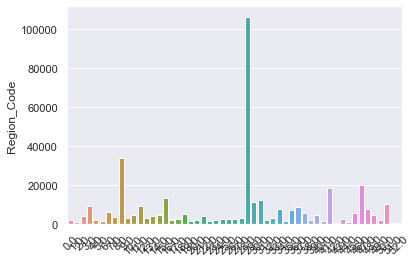

Graph for Previously_Insured


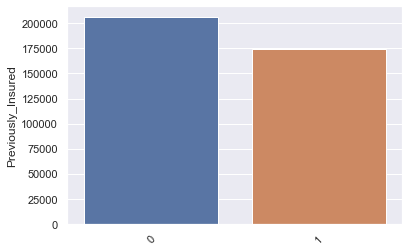

Graph for Vehicle_Age


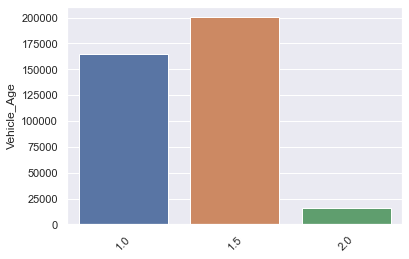

Graph for Vehicle_Damage


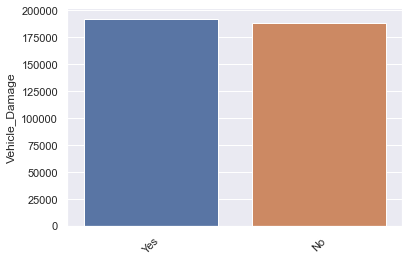

Graph for Policy_Sales_Channel


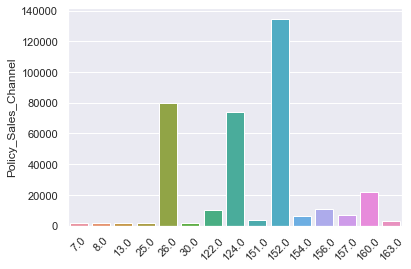

In [62]:
for i in categorical.columns:
    print("Graph for {}".format(i))
    if(i == 'Policy_Sales_Channel'):
        cat = categorical[i].value_counts()[:30]
        chart = sns.barplot(x=cat.index, y=cat)
        plt.xticks(rotation=45)
        plt.show()
    else:
        cat = categorical[i].value_counts()
        chart = sns.barplot(x=cat.index, y=cat)
        plt.xticks(rotation=45)
        plt.show()

In [63]:
policy_sale_pivot = pd.pivot_table(df, index=['Policy_Sales_Channel', 'Gender'], values='Response')
policy_sale_pivot
#policy_sale_rank = policy_sale_pivot.reindex(policy_sale_pivot['Response'].sort_values(ascending=False).index)
#policy_sale_rank

Response
Policy_Sales_Channel Gender          
1.0                  Female  0.039560
                     Male    0.027464
2.0                  Male    0.250000
3.0                  Female  0.283019
                     Male    0.318328
...                               ...
159.0                Male    0.043478
160.0                Female  0.021473
                     Male    0.022200
163.0                Female  0.303132
                     Male    0.304652

[291 rows x 1 columns]

In [64]:
policy_sale_pivot_ranked = pd.pivot_table(df, index=['Gender'], values='Response')
policy_sale_pivot_ranked

,Response
Gender,
Female,0.103902
Male,0.138411


In [65]:
region_code_pivot = pd.pivot_table(df, index=['Region_Code'], values='Response')
region_code_pivot

,Response
Region_Code,
0.0,0.086096
1.0,0.108135
2.0,0.071075
3.0,0.127662
4.0,0.158245
5.0,0.115715
6.0,0.069904
7.0,0.131747
8.0,0.096142


In [66]:
region_code_pivot_rank = region_code_pivot.reindex(region_code_pivot['Response'].sort_values(ascending=False).index)
region_code_pivot_rank

,Response
Region_Code,
38.0,0.192004
28.0,0.187163
19.0,0.162866
4.0,0.158245
23.0,0.153061
51.0,0.153005
24.0,0.141615
7.0,0.131747
18.0,0.131574
